In [2]:
import json
import os
import sqlite3

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# version to wide e.g
#version = 1
version = 2
params_path = f'results/reconstruction_experiment_inc_noise/butterfly_reconstruction/version_{version}/params.json'

In [4]:
with open(params_path, 'r') as fp:
        params_dict = json.load(fp)
value_db_path = os.path.join(params_dict['result_dir'], 'values.db')

In [5]:
connection = sqlite3.connect(value_db_path)
cursor = connection.cursor()

In [6]:
cursor.execute("SELECT * from reconstruction_experiment_inc_noise_metrics")
psnr, psnr_deg, ssim, ssim_deg, lam = zip(*cursor.fetchall())

In [7]:
cursor.execute("SELECT lam, MAX(ssim) from reconstruction_experiment_inc_noise_metrics")
max_point_ssim = cursor.fetchone()
cursor.execute("SELECT lam, MIN(ssim) from reconstruction_experiment_inc_noise_metrics")
min_point_ssim = cursor.fetchone()
print(f'Max SSIM was calculated at', max_point_ssim)

Max SSIM was calculated at (0.05263157894736842, 0.9120296945913616)


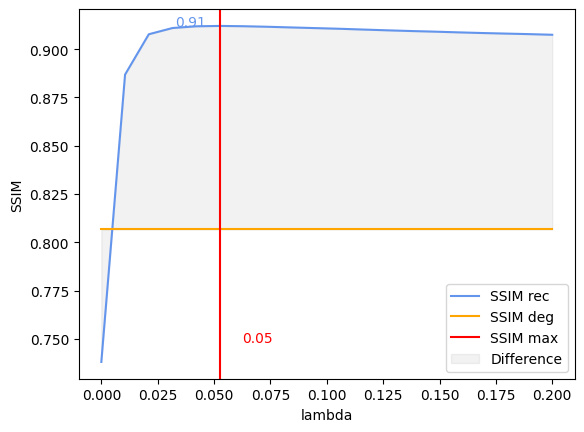

In [8]:
plt.plot(lam, ssim, color='cornflowerblue', label='SSIM rec')
plt.plot(lam, ssim_deg, color='orange', label='SSIM deg')
plt.axvline(max_point_ssim[0], color='r', label='SSIM max')
plt.fill_between(lam,ssim, ssim_deg, alpha=0.1, color='gray', label='Difference')
plt.text(max_point_ssim[0]+0.01, min_point_ssim[1]+0.01, f'{max_point_ssim[0]:.2f}', color='r')
plt.text(max_point_ssim[0]-0.02, max_point_ssim[1], f'{max_point_ssim[1]:.2f}', color='cornflowerblue')
plt.xlabel('lambda')
plt.ylabel('SSIM')
plt.legend()
plt.show()

In [9]:
cursor.execute("SELECT lam, MAX(psnr) from reconstruction_experiment_inc_noise_metrics")
max_point_psnr = cursor.fetchone()
cursor.execute("SELECT lam, MIN(psnr) from reconstruction_experiment_inc_noise_metrics")
min_point_psnr = cursor.fetchone()
print(f'Max PSNR was calculated at', max_point_psnr)

Max PSNR was calculated at (0.08421052631578947, 26.62716625398598)


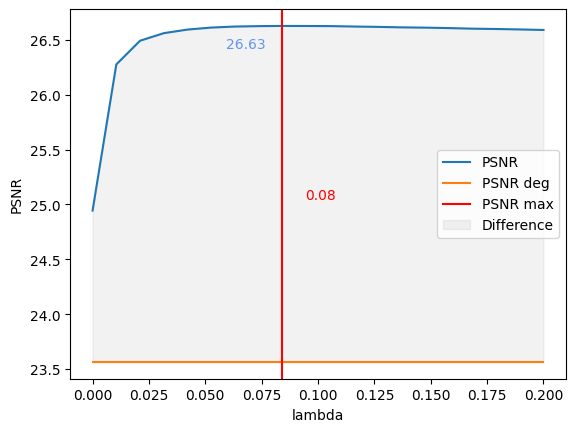

In [10]:
plt.plot(lam, psnr, label='PSNR')
plt.plot(lam, psnr_deg, label='PSNR deg')
plt.axvline(max_point_psnr[0], color='r', label='PSNR max')
plt.fill_between(lam,psnr, psnr_deg, alpha=0.1, color='gray', label='Difference')
plt.text(max_point_psnr[0]+0.01, min_point_psnr[1]+0.1, f'{max_point_psnr[0]:.2f}', color='r')
plt.text(max_point_psnr[0]-0.025, max_point_psnr[1]-0.2, f'{max_point_psnr[1]:.2f}', color='cornflowerblue')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('PSNR')
plt.show()